In [32]:
from numpy import *
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

**Scenario Description**

The elementary reversible liquid phase isomerisation reaction is studied. Pure A, at the inlet conditions as specified in the table below, must be processed in a steady state flow reactor:
$$A \leftrightharpoons B$$
Some kinetic and thermodynamic data on the reaction are also given in the table below:

<img src="CRO410Exam1a.JPG" width="550" />

In [33]:
Q     =    1e-3 #m3/s
FAo   =     0.1 #mol/s
CAo   =   FAo/Q #mol/m3
CBo   =       0 #mol/m3 
To    =     400 #K
k1    = 1.67e-3 #1/s at 400K
Ea    =   80000 #J/mol
CpA   =     120 #J/mol.K
CpB   =     CpA
dHref = -100000 #J/mol
kcref =     100 #at 400K
k2    =k1/kcref #at 400K
R     =   8.314

1. NBNBNB Declare that this is your own work. Please read the declaration provided in the test canvas and confirm whether it is TRUE/FALSE 

**2. What is the maximum possible conversion that can be achieved in any type of adiabatic reactor given the inlet conditions of this system? Give answer as a percentage and round to three significant numbers (e.g. 12.3)** [5]

**For $A \rightleftharpoons B$, the rate equation:**
\begin{align}
r_{A} &= -k_{i}C_{A} + k_{j}C_{B} \nonumber \\
0 &= -k_{i}C_{A_{eq}} + k_{j}C_{B_{eq}}\nonumber \\
k_{i}C_{A_{eq}} &= k_{j}C_{B_{eq}}\nonumber \\
\therefore K_{c} &= \dfrac{k_{i}}{k_{j}} = \dfrac{C_{B_{eq}}}{C_{A_{eq}}} \nonumber \\
and\ k_{j} &= \dfrac{k_{i}}{K_{c}} \nonumber \\
\therefore -r_{A} &= k_{i}\left( C_{A} - \dfrac{C_{B}}{K_{c}} \right) \nonumber \\
C_{A} &= C_{A_{0}}(1 - X_{eq})  \nonumber \\
C_{B} &= C_{A_{0}}X_{eq}  \nonumber 
\end{align}
**At equilibrium**:
\begin{align}
0 &= C_{A_{0}}(1 - X_{eq}) - \dfrac{C_{A_{0}}X_{eq}}{K_{c}} \nonumber \\
1 - X_{eq} &=  \dfrac{X_{eq}}{K_{c}} \nonumber \\
1 &= X_{eq}\left(\dfrac{1 + K_{c}}{K_{c}} \right) \nonumber \\
X_{eq} = \dfrac{K_{c}}{1 + K_{c}} \nonumber
\end{align}

**For equilibrium:**
\begin{align}
K_{c} &= \dfrac{C_{B_{eq}}}{C_{A_{eq}}} \nonumber 
\end{align}
**Gibbs free energy:**
\begin{align}
\Delta G^{\Theta} &= \Delta H^{\Theta} - T\Delta S^{\Theta} \nonumber \\
\Delta G^{\Theta} &= -RTln(K_{c}) \nonumber \\
\therefore ln(K_{c}) &= \Delta H^{\Theta} - T\Delta S^{\Theta} \nonumber \\
ln(K_{c}) &= \dfrac{-\Delta H^{\Theta}}{RT} + \dfrac{S^{\Theta}}{R} \nonumber
\end{align}
**Van't Hoff Equation can thus be defined from above:**
\begin{align}
ln(K_{c_{2}}) - ln(K_{c_{1}})&= \dfrac{-\Delta H^{\Theta}}{RT_{2}} + \dfrac{S^{\Theta}}{R} - \dfrac{-\Delta H^{\Theta}}{RT_{1}} - \dfrac{S^{\Theta}}{R} \nonumber \\
ln(\dfrac{K_{c_{2}}}{K_{c_{1}}})&= \dfrac{-\Delta H^{\Theta}}{R}\left(\dfrac{1}{T_{2}} - \dfrac{1}{T_{1}} \right)  \nonumber
\end{align}
**Therefore, for this problem:**
\begin{align}
ln(\dfrac{K_{c}}{K_{c_{ref}}})&= \dfrac{-\Delta H_{RX}}{R}\left(\dfrac{1}{T} - \dfrac{1}{T_{ref}} \right)  \nonumber \\
K_{c} &= K_{c_{ref}}e^{\dfrac{-\Delta H_{RX}}{R}\left(\dfrac{1}{T} - \dfrac{1}{T_{ref}} \right)}  \nonumber 
\end{align}

**Energy balance equation:**
\begin{align}
T &= T_{0} + \dfrac{-\Delta H_{RX}}{C_{p_{A}}}X_{eq} \nonumber 
\end{align}

In [34]:
def Q2(Xeq):
    T = To + (-dHref/CpA)*Xeq
    Kc = kcref*exp((-dHref/R)*((1/T)-(1/To))) #Van't Hoff
    eq1 = Xeq - Kc/(1 + Kc)
    return (eq1)

In [35]:
guess = [0.5]

ans = fsolve(Q2,guess)
ans

array([0.1320619])

In [36]:
print('Max Conversion= '+str(ans[0]*100)+' %')

Max Conversion= 13.206189529419332 %


**3. A CSTR with a volume of $V_{CSTR} = 0.01~m^{3}$ is available. What is the maximum possible conversion of A that can be achieved in this CSTR? (operating temperature can be selected – so not restricted to adiabatic operation). Give answer as a percentage and round to three significant numbers (e.g. 12.3)** [5]

In [37]:
V3 = 0.01 #m3 

CSTR mole balance:
\begin{align}
F_{A_{0}} - F_{A} + r_{A}V &= 0 \nonumber \\
F_{A_{0}} - F_{A_{0}}(1 - X_{A}) &= -r_{A}V \nonumber \\
F_{A_{0}}X_{A} &= -r_{A}V \nonumber \\
r_{A} &= \dfrac{-F_{A_{0}}X_{A}}{V} \nonumber 
\end{align}
Rate equation:
\begin{align}
r_{A} &= -k_{1}\left( C_{A} - \dfrac{C_{B}}{K_{c}} \right) \nonumber \\
r_{A} &= -k_{1}\left[ C_{A_{0}}(1 - X) - \dfrac{C_{A_{0}}X}{K_{c}} \right] \nonumber \\
\dfrac{-F_{A_{0}}X}{V} &= -k_{1}\left[ C_{A_{0}}(1 - X) - \dfrac{C_{A_{0}}X}{K_{c}} \right] \nonumber \\
\dfrac{C_{A_{0}}QX}{V} &= k_{1}C_{A_{0}}\left[1 - X - \dfrac{X}{K_{c}} \right] \nonumber \\
\dfrac{QX}{V} &= k_{1}\left[1 - \dfrac{X(K_{c} + 1)}{K_{c}} \right] \nonumber \\
X\left[\dfrac{Q}{V} + \dfrac{k_{1}(K_{c} + 1)}{K_{c}} \right] &= K_{1} \nonumber \\
X\left[\dfrac{QK_{c} + k_{1}V(K_{c} + 1)}{K_{c}V} \right] &= K_{1} \nonumber \\
X &= k_{1}\left[\dfrac{K_{c}V}{QK_{c} + k_{1}V(K_{c} + 1)} \right] \nonumber \\
X &= \left[\dfrac{k_{1}K_{c}V}{QK_{c} + k_{1}VK_{c} + k_{1}V} \right] \times \dfrac{1/(QK_{c})}{1/(QK_{c})} \nonumber \\
X &= \left[\dfrac{k_{1}\dfrac{V}{Q}}{1 + k_{1}\dfrac{V}{Q} + \dfrac{k_{1}}{K_{c}}\dfrac{V}{Q}} \right] \nonumber 
\end{align}


*The temperature is now varied (different operating temperatures, and the conversion is set as a function of temperature. This will show if there is an optimal temperature where the conversion is at it's maximum. Van't Hoff is again used to vary the equilibrium constant, $K_{c}$*

In [38]:
Tmax = To + (-dHref/CpA)
Tmax

1233.3333333333335

In [39]:
tspan = linspace(To, Tmax, 1000)
ko = k1*exp(Ea/(R*To))
kt = ko*exp(-Ea/(R*tspan))
Kc = kcref*exp((-dHref/R)*((1/tspan)-(1/To)))

In [40]:
a = kt*V3/Q
b = 1 + kt*V3/Q + kt*V3/(Kc*Q)
X3 = a/b

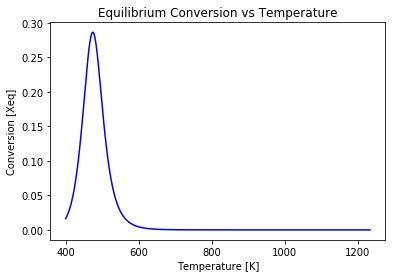

In [41]:
plt.figure(1)
plt.plot(tspan, X3, color='blue')
plt.title('Equilibrium Conversion vs Temperature')
plt.ylabel('Conversion [Xeq]') 
plt.xlabel('Temperature [K]') 
plt.show()

In [42]:
Xmax = max(X3)
print('Max conversion= '+str(Xmax*100)+'%')

Max conversion= 28.62340423653133%


________________________________________________________

**4. Would it be possible to achieve this conversion (calculated in 3), if the CSTR is operated adiabatically and you have the option of increasing or decreasing the reactor inlet temperature? Comment on the practicality of this  approach. Submit your answer (YES/NO) as WELL as your explanation and comments in the essay block provided. You may support your answer by illustrations or images in your pdf document uploaded in 6 and/or 7 – refer to them in the text box** [4]

*From theory we know that an adiabatic reactor (without any utility power) provides a straight line relationship between conversion and temperature. In the previous question, we already produced a graph to show the conversion as a function of temperature where the reactor operating temperature is allowed to vary. So now, if we superimpose both graphs - if the intersect, then we know that the same conversion is possible in both cases, viz-a-viz, adiabatic or non-adiabatic conditions *

The adiabatic energy balance equation
\begin{align}
T &= T_{0} + \dfrac{(-\Delta H_{RX_{j}})(F_{A_{0}}/a)}{\Sigma_{i}F_{i_{0}}C_{p_{i}}}X_{eq} \nonumber
\end{align}
is expressed now in terms of conversion:
\begin{align}
X_{eq} &= -\dfrac{\Sigma_{i}F_{i_{0}}C_{p_{i}}}{\Delta H_{RX_{j}}(F_{A_{0}}/a)}T + \dfrac{\Sigma_{i}F_{i_{0}}C_{p_{i}}T_{0}}{\Delta H_{RX_{j}}(F_{A_{0}}/a)} \nonumber \\
X_{eq} &= -\dfrac{C_{p_{A}}}{\Delta H_{RX}}T + \dfrac{C_{p_{A}}T_{0}}{\Delta H_{RX}} \nonumber \\
y &= mx + c \nonumber
\end{align}

In [43]:
m = -CpA/dHref
c =  CpA*To/dHref
X4 = m*tspan + c

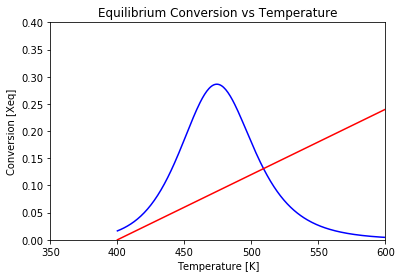

In [44]:
plt.figure(2)
plt.plot(tspan, X3, color='blue')
plt.plot(tspan, X4, color='red')
plt.axis([350, 600,0.0,0.4])
plt.title('Equilibrium Conversion vs Temperature')
plt.ylabel('Conversion [Xeq]') 
plt.xlabel('Temperature [K]') 
plt.show()

The above graph shows that with the inlet temperature, it is not possible to get the same maximum conversion where operating temperature is allowes to be chosen. This would be possible if the inlet temperature is cooled, thereby shifting the straight line left.

In [45]:
Tin = 235 #vary this to shift the straight line
tspan1 = linspace(200, 600, 1000)
d =  CpA*Tin/dHref
X4cooled = m*tspan1 + d

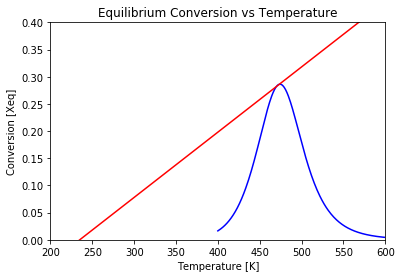

In [46]:
plt.figure(3)
plt.plot(tspan, X3, color='blue')
plt.plot(tspan1, X4cooled, color='red')
plt.axis([200, 600,0.0,0.4])
plt.title('Equilibrium Conversion vs Temperature')
plt.ylabel('Conversion [Xeq]') 
plt.xlabel('Temperature [K]') 
plt.show()

-------------------------------------------------------------------

**5. The CSTR is now supplied with a heating/cooling jacket such that $UA = 240~W/K$. Specify the utility temperature $T_{U}$ that must be used in order to achieve the maximum possible conversion you calculated in the reactor if the inlet temperature is kept at $T_{0} = 400~K$. Give answer in $K$ and round to a whole number (i.e. 321)** [4]

From the CSTR mole balance and rate equation in Q3:
\begin{align}
X_{eq} &= \left[\dfrac{k_{1}\dfrac{V}{Q}}{1 + k_{1}\dfrac{V}{Q} + \dfrac{k_{1}}{K_{c}}\dfrac{V}{Q}} \right] \nonumber 
\end{align}
where 

\begin{align}
k_{1} &= k_{0}e^{-Ea/RT} \nonumber
\end{align}

and 

\begin{align}
K_{c} &= K_{c_{ref}}e^{\dfrac{-\Delta H_{RX}}{R}\left(\dfrac{1}{T} - \dfrac{1}{T_{ref}} \right)}  \nonumber 
\end{align}

The energy balance for a non-adiabatic CSTR:
\begin{align}
T = -\dfrac{F_{A_{0}}\Delta H_{RX_{j}}^{\circ}}{F_{A_{0}}C_{p_{A}} + UA}X_{eq} + \dfrac{UAT_{U} + F_{A_{0}}C_{p_{A}}T_{0}}{F_{A_{0}}C_{p_{A}} + UA} \nonumber \\
\end{align}

In [47]:
UA         = 240 #W/K
Tuspan     = linspace(200, 700, 100)
Conversion = []
Topt       = []

In [48]:
for vals in Tuspan:
    Tu    = vals
    X5    = 0.5 #guess
    error = 0.1
    
    while error >= 0.0000000001:
        M    = -FAo*dHref/(FAo*CpA + UA)
        C    = (UA*Tu + FAo*CpA*To )/(FAo*CpA + UA)
        Tnew = M*X5 + C
        knew = ko*exp(-Ea/(R*Tnew))
        Kc   = kcref*exp((-dHref/R)*((1/Tnew)-(1/To)))
        a    = knew*V3/Q
        b    = 1 + knew*V3/Q + knew*V3/(Kc*Q)
        Xnew = a/b
        error= abs(X5 - Xnew)
        X5   = Xnew
        
    Conversion.append(X5)
    Topt.append(Tnew)

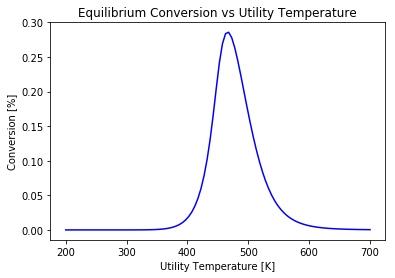

In [49]:
plt.figure(4)
plt.plot(Tuspan, Conversion, color='blue')
#plt.axis([200, 600,0.0,0.4])
plt.title('Equilibrium Conversion vs Utility Temperature')
plt.ylabel('Conversion [%]') 
plt.xlabel('Utility Temperature [K]') 
plt.show()

In [50]:
Xmax5 = max(Conversion)
Xmax

0.2862340423653133

In [51]:
i  = argmax(Conversion==max(Conversion))
Tu_opt = Tuspan[i]
Tu_opt

467.67676767676767

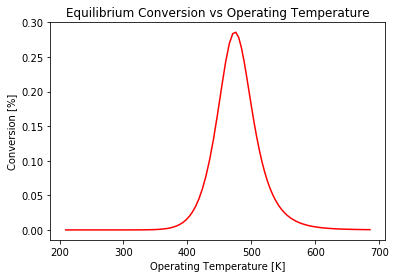

In [52]:
plt.figure(5)
plt.plot(Topt, Conversion, color='red')
#plt.axis([200, 600,0.0,0.4])
plt.title('Equilibrium Conversion vs Operating Temperature')
plt.ylabel('Conversion [%]') 
plt.xlabel('Operating Temperature [K]') 
plt.show()

In [53]:
Tbest = Topt[i]
Tbest

475.7906919590619

The maximum conversion is $28.6~\%$ at the optimal utility temperature of $467.7~K$ and an operating temperature of $475.8~K$

-------------------------------------------------------------------

**6. Assume that $32~\%$ conversion of A is achieved in the CSTR reactor (not the correct answer but use this value for calculations in Question 6 and Question 7) The outlet from the CSTR is now cooled to a temperature of $350~K$ in a heat exchanger where no reaction takes place. This cooled stream is fed to an adiabatic PFR. Specify the volume of that PFR if the
OVERALL conversion of A that must be achieved in this two-reactor system must be $45~\%$. Give answer in units of $m^{3}$ and round to 3 significant numbers (i.e. 0.123 or 1.23)** [5]

In [54]:
Xcstr  = 0.32 #X6 = 0.45 overall
Topfr  = 350 #K
CAcstr = CAo*(1 - Xcstr)
CAopfr = CAcstr
CApfr  = CAo*(1 - 0.45)
CBopfr = CAo*Xcstr

In [55]:
Xpfr = (CAopfr - CApfr)/CAopfr
Xpfr

0.1911764705882352

In [56]:
FAin = CAopfr*Q
FBin = CBopfr*Q

From the PFR mole balance and rate equation:
\begin{align}
\dfrac{dF_{A}}{dV} &= r_{A} \nonumber \\
-F_{A_{0}}\dfrac{dX}{dV} &= -k_{1}\left[ C_{A_{0}}(1 - X) - \dfrac{C_{A_{0}}X}{K_{c}} \right] \nonumber \\
-QC_{A_{0}}\dfrac{dX}{dV} &= -k_{1}C_{A_{0}}\left[1 - \dfrac{X(K_{c} + 1)}{K_{c}} \right] \nonumber \\
let\ a&= \dfrac{(K_{c} + 1)}{K_{c}} \nonumber \\
\therefore \dfrac{Q}{k_{1}}\dfrac{dX}{dV} &= 1 - aX \nonumber \\
\dfrac{Q}{k_{1}}\int^{X_{PFR}}_{0}\dfrac{dX}{1-aX}&= V \nonumber \\
V &= -\dfrac{Q}{k_{1}}\dfrac{1}{a}\ln(1-aX_{PFR}) \nonumber
\end{align}

The above is incorrect because $K_{c}$ varies with temperature. So an odeint route needs to be taken.

Approach: and odeint command will be used whereby the maximum volume will be changed until the conversion equals what was calculated above.

In [57]:
def Q6(var,V):
    FA, FB, T = var
    CA = FA/Q
    CB = FB/Q
    #X6    = (CAopfr - CA)/CAopfr
    #T6    = Topfr + (-dHref/CpA)*X6
    ki    = ko*exp(-Ea/(R*T))
    Kc6   = kcref*exp((-dHref/R)*((1/T)-(1/To)))
    rA    = -ki*(CA - CB/Kc6)
    rB    = -rA
    dFAdV = rA
    dFBdV = rB
    #dTdV  = rA*dHref/(FAo*CpA) #USE THE VERY INITIAL FAo, BUT WHY? See explanation below
    dTdV  = rA*dHref/(FAin*CpA + FBin*CpB)
    return dFAdV,dFBdV,dTdV    

In [58]:
Xpfr
#Topfr

0.1911764705882352

In [59]:
V = 0.46483 #m3  Keep changing until conversion for PFR = Xpfr
vspan6 = linspace(0,V,1000)
init = [FAin,FBin,Topfr]
sols = odeint(Q6,init,vspan6)

FA,FB,T6 = sols.T

Xpfr6 = (FAin - FA[-1])/FAin
Xpfr6

0.19113051932103167

For an adiabatic PFR, doing an energy balance over $dV$ without using $X_{eq}$
\begin{align}
0 &= \Sigma_{i} F_{i,0}C_{p_{i}}\dfrac{dT}{dV} + \dfrac{d\dot{\epsilon}}{dV}\Delta H_{RX_{j}} \nonumber 
\end{align}
where
\begin{align}
\dfrac{d\dot{\epsilon}}{dV} &= -\dfrac{\dfrac{1}{\nu_{A}}dF_{A}}{dV} \nonumber \\
&= -\dfrac{1}{\nu_{A}}\dfrac{dF_{A}}{dV} \nonumber \\
&= -\dfrac{dF_{A}}{dV} \nonumber \\
&= -rA
\end{align}
$\nu_{A}=1$ in this reaction, and negative sign to indicate depletion

So the energy balance for this reversible, adiabatic PFR reaction becomes
\begin{align}
0 &= (FA_{in}C_{p_{A}} + FB_{in}C_{p_{B}})\dfrac{dT}{dV} - r_{A}\Delta H_{RX} \nonumber \\
\dfrac{dT}{dV} &= \dfrac{r_{A}\Delta H_{RX}}{(FA_{in}C_{p_{A}} + FB_{in}C_{p_{B}})} \nonumber
\end{align}
This is equivalent in this case to
\begin{align}
\dfrac{dT}{dV} &= \dfrac{r_{A}\Delta H_{RX}}{(FA_{0}C_{p_{A}})} \nonumber
\end{align}
as we are interested to include the entire energy-carrying capacity of the reactants into the reactors

--------------------------------------------------------------------

**7. What is the outlet temperature from this PFR reactor? Give answer in K and round to a whole number (e.g. 432)** [2]

In [61]:
print('PFR outlet Temp= '+str(T6[-1])+'K')

PFR outlet Temp= 458.3072942819178K
